In [1]:
import sys

sys.path.append("../")

In [2]:
import cheetah
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from gymnasium import spaces
from gymnasium.wrappers import RescaleAction
from stable_baselines3.common.env_checker import check_env

from compare.cern_shared.environment import e_trajectory_simENV
from src.environments.awake_e_steering import AwakeESteering
from src.wrappers import RescaleObservation

In [3]:
old_env = e_trajectory_simENV()

new_env = AwakeESteering()
wrapped_new_env = RescaleAction(new_env, -1, 1)
wrapped_new_env = RescaleObservation(
    wrapped_new_env, -1, 1, assumed_space=spaces.Box(-1e-2, 1e-2, shape=(10,))
)

/Users/jankaiser/Documents/DESY/rl4aa24-tutorial/notebooks/../compare/cern_shared/utils/twissReader.py:433: UserWarning: MISSING FIELD PX IN TWISS INPUT ../src/environments/electron_tt43.out
  twissH, twissV = readTwissFromMADX(filename_awakeElectron)
/Users/jankaiser/Documents/DESY/rl4aa24-tutorial/notebooks/../compare/cern_shared/utils/twissReader.py:433: UserWarning: MISSING FIELD PY IN TWISS INPUT../src/environments/electron_tt43.out
  twissH, twissV = readTwissFromMADX(filename_awakeElectron)


In [4]:
# check_env(old_env)

In [5]:
check_env(wrapped_new_env)

In [6]:
old_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [7]:
new_env.action_space

Box(-0.0003, 0.0003, (10,), float32)

In [8]:
wrapped_new_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [9]:
old_env.observation_space

Box(-1.0, 1.0, (10,), float32)

In [10]:
new_env.observation_space

Box(-inf, inf, (10,), float32)

In [11]:
wrapped_new_env.observation_space

Box(-inf, inf, (10,), float32)

In [12]:
old_env.reset()

(array([-0.00453116, -0.0147505 , -0.05143581, -0.10500489, -0.22723408,
         0.2933639 ,  0.6193302 ,  0.46016344,  0.25234285,  0.10701207],
       dtype=float32),
 {})

In [13]:
new_env.reset()

(array([-0.00017975, -0.0004808 , -0.00150834, -0.00290151, -0.00756885,
         0.00882452,  0.01960834,  0.01527194,  0.0100385 ,  0.00725834],
       dtype=float32),
 {'backend_info': {'incoming_beam': array([1.0000000e+08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 9.8234415e-04, 1.9646883e-04, 9.8234415e-04,
          1.9646883e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [14]:
wrapped_new_env.reset()

(array([-0.01081228, -0.01424432, -0.02880514, -0.07218105, -0.19390595,
         0.2163539 ,  0.48610866,  0.3784523 ,  0.2590704 ,  0.20982862],
       dtype=float32),
 {'backend_info': {'incoming_beam': array([1.0000000e+08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 9.8234415e-04, 1.9646883e-04, 9.8234415e-04,
          1.9646883e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

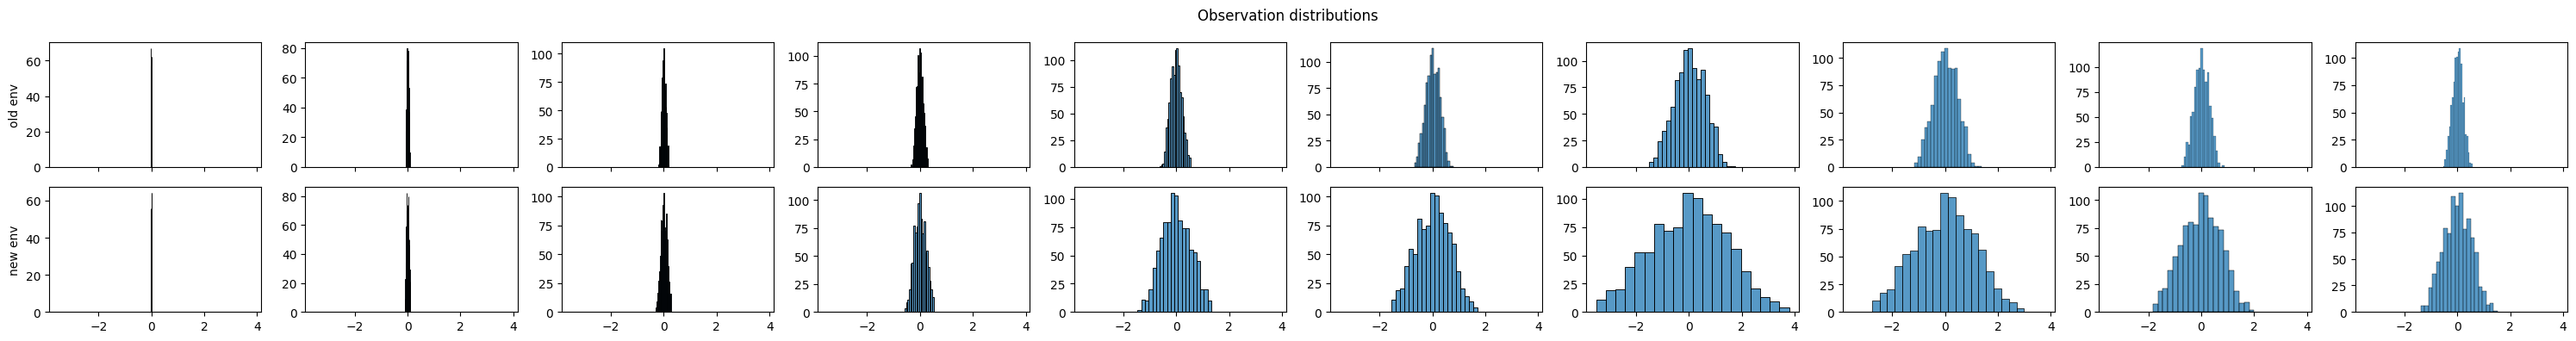

In [15]:
old_env_observations = []
new_env_observations = []
for _ in range(1_000):
    old_env_observations.append(old_env.reset()[0])
    new_env_observations.append(wrapped_new_env.reset()[0])

old_env_observations = np.array(old_env_observations)
new_env_observations = np.array(new_env_observations)

fig, axs = plt.subplots(2, 10, figsize=(30, 4), sharex=True)
for i in range(10):
    sns.histplot(old_env_observations[:, i], ax=axs[0, i], bins=20)
    sns.histplot(new_env_observations[:, i], ax=axs[1, i], bins=20)
    axs[0, i].set_ylabel(None)
    axs[1, i].set_ylabel(None)
axs[0, 0].set_ylabel("old env")
axs[1, 0].set_ylabel("new env")
fig.suptitle("Observation distributions")
plt.tight_layout()
plt.show()

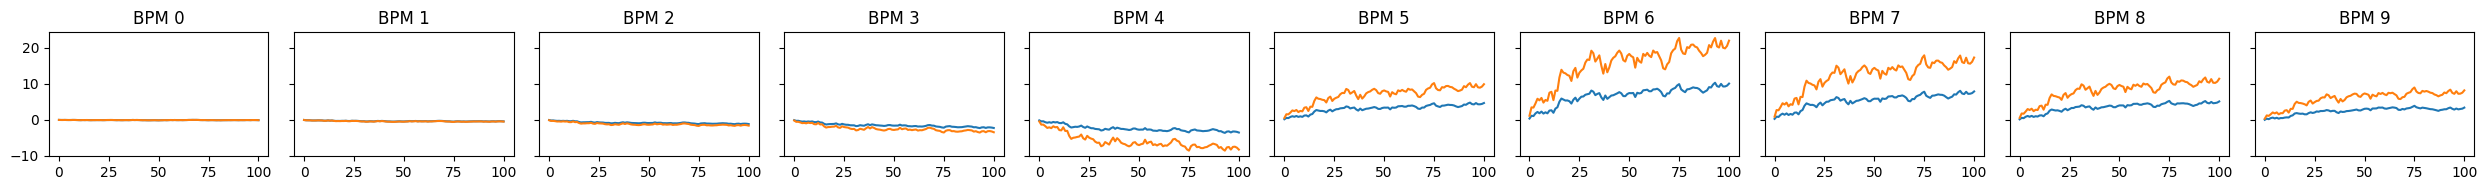

In [16]:
old_observations = []
new_observations = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = old_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
plt.tight_layout()
plt.show()

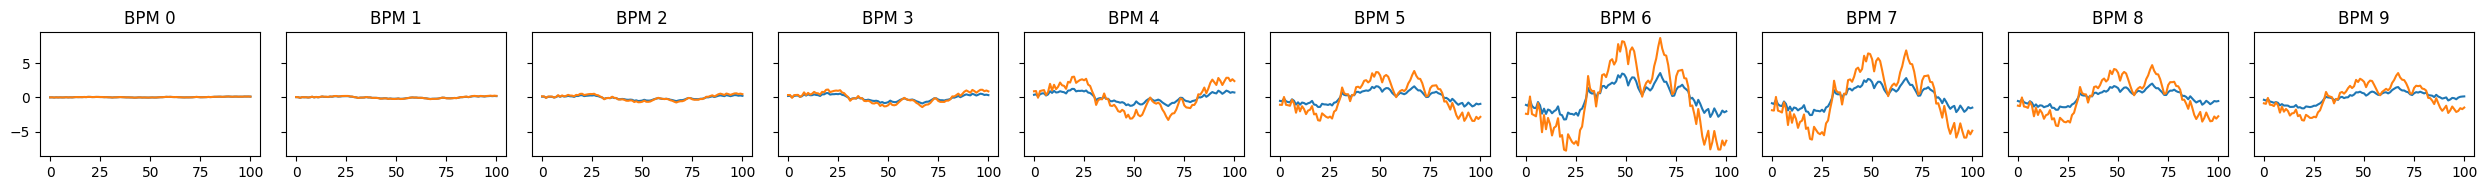

In [17]:
old_observations = []
new_observations = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = wrapped_new_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
plt.tight_layout()
plt.show()